### Charger les valeurs d'accuracy construites dans un précédent script (2018-02-16_clasiffier)

In [2]:
import numpy as np
import os

path = "MNIST_accuracy.npy"
if os.path.isfile(path):
    print('Loading accuracy...')
    accuracy =  np.load(path)
    print(accuracy)

Loading accuracy...
[[ 0.0974  0.0974  0.0974 ...,  0.0974  0.0974  0.0974]
 [ 0.0974  0.0974  0.0974 ...,  0.0974  0.0974  0.0974]
 [ 0.0974  0.0974  0.0974 ...,  0.0974  0.0974  0.0974]
 ..., 
 [ 0.0974  0.0974  0.0974 ...,  0.0974  0.0974  0.0974]
 [ 0.0974  0.0974  0.0974 ...,  0.0974  0.0974  0.0974]
 [ 0.0974  0.0974  0.0974 ...,  0.0974  0.0974  0.0974]]


### Afficher la carte d'accuracy

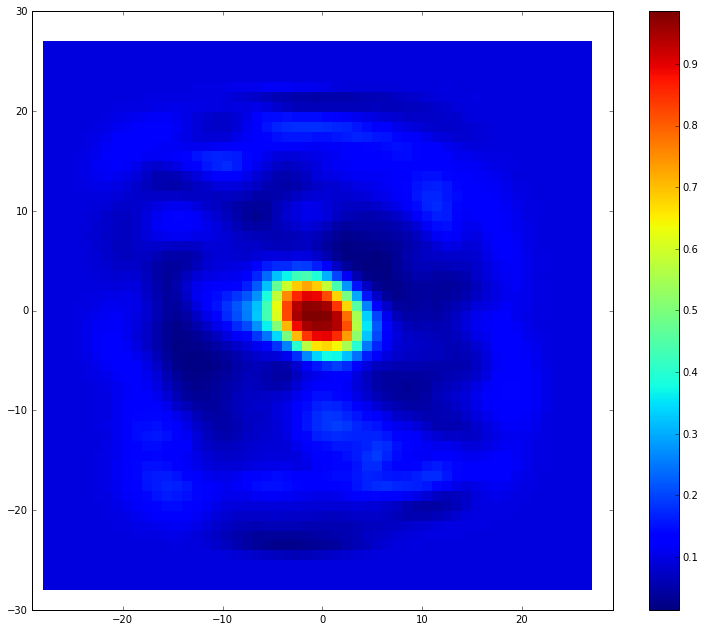

In [4]:
import matplotlib.pyplot as plt

N_pic = 28
fig, ax = plt.subplots(figsize=(13, 10.725))
cmap = ax.pcolor(np.arange(-N_pic, N_pic), np.arange(-N_pic, N_pic), accuracy)
ax.axis('equal')
fig.colorbar(cmap)

### Translater la carte d'accuracy dans un espace plus grand

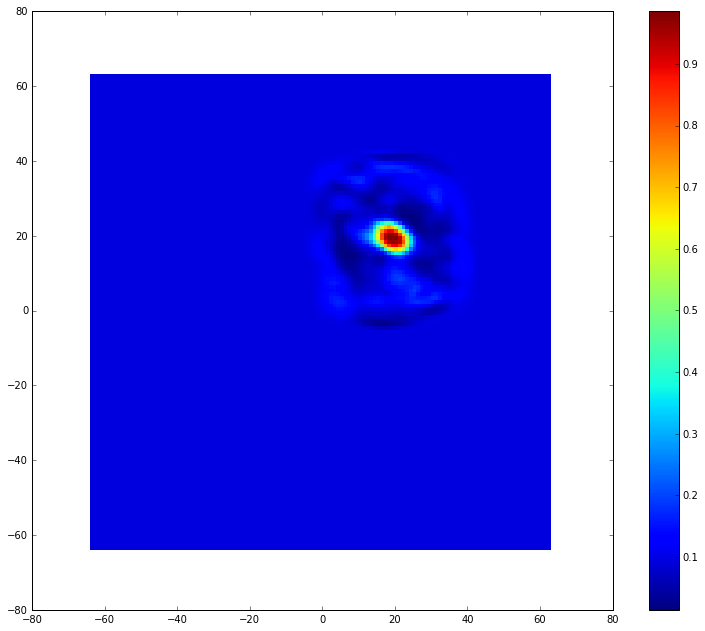

In [9]:
N_pic = 128
center = (128-55)//2
i_offset, j_offset = 20, 20

accuracy_128 = accuracy[0][0] * np.ones((N_pic,N_pic))
accuracy_128[(center+i_offset):(center+55+i_offset),(center+j_offset):(center+55+j_offset)] = accuracy
fig, ax = plt.subplots(figsize=(13, 10.725))
cmap = ax.pcolor(np.arange(-N_pic/2, N_pic/2), np.arange(-N_pic/2, N_pic/2), accuracy_128)
fig.colorbar(cmap)

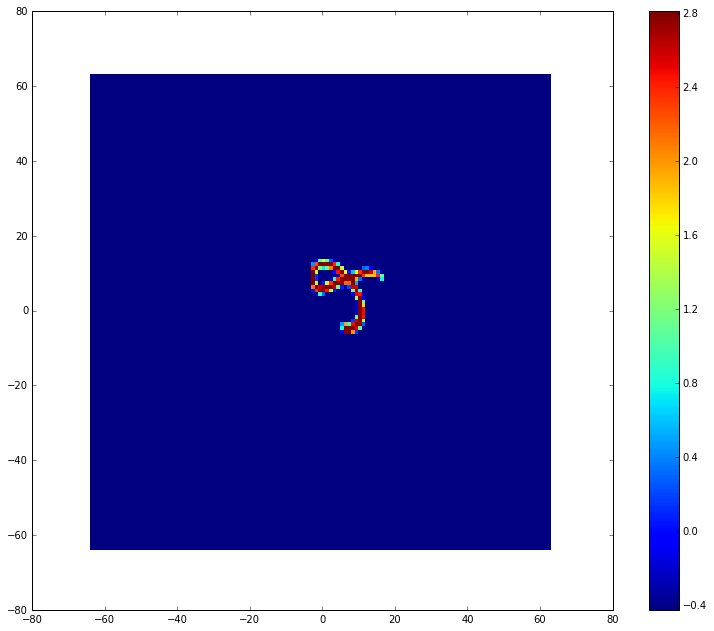

In [28]:
import torch
#import torch.nn as nn
#import torch.nn.functional as F
#import torch.optim as optim

data_loader = torch.utils.data.DataLoader(
    datasets.MNIST('/tmp/data', 
                   train=False, 
                   download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))])),
                   batch_size=1, 
                   shuffle=True)

N_pic = 128
center = (128-55)//2
i_offset, j_offset = 20, 20

for batch_idx, (data, target) in enumerate(data_loader):
    data_128 = data.min() * np.ones((128,128))
    data_128[(center+i_offset):(center+28+i_offset),(center+j_offset):(center+28+j_offset)] = data

    
    fig, ax = plt.subplots(figsize=(13, 10.725))
    cmap = ax.pcolor(np.arange(-N_pic/2, N_pic/2), np.arange(-N_pic/2, N_pic/2), data_128)
    fig.colorbar(cmap)
    if batch_idx == 0: break